# Explore


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_grades

In [2]:
#plt.rc sets defaults for matplotlib figures
plt.rc('font', size = 13)
plt.rc('figure', figsize = (13, 7))


In [3]:
df = wrangle_grades()
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_and_validate, test = train_test_split(df, test_size = .1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size = .1, random_state = 123)

train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

In [6]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


## Continuous and Continous

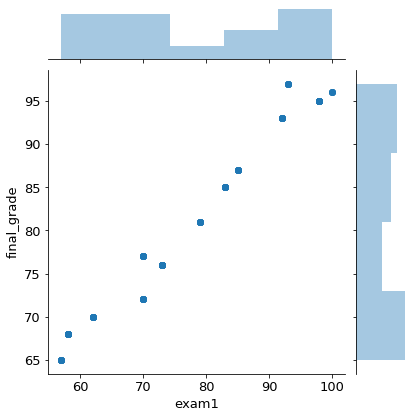

In [8]:
#to see a histogram and scatterplot. 
#histo for final grade on right, exam 1 on top
sns.jointplot(x = 'exam1', y = 'final_grade', data = train)
plt.show()

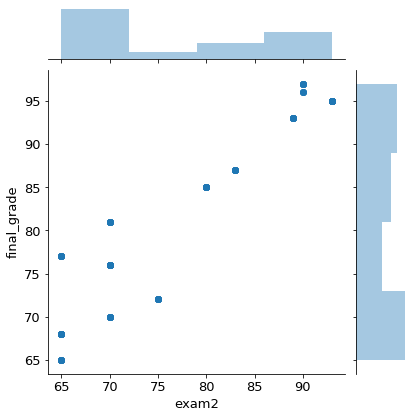

In [9]:
sns.jointplot(x = 'exam2', y = 'final_grade', data = train)
plt.show()

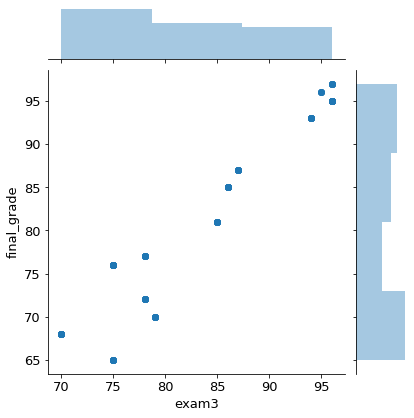

In [10]:
sns.jointplot(x = 'exam3', y = 'final_grade', data = train)
plt.show()

Thoughts: Is there a stronger correlation between exams 1 and 3 and final grade compared to exam 2?

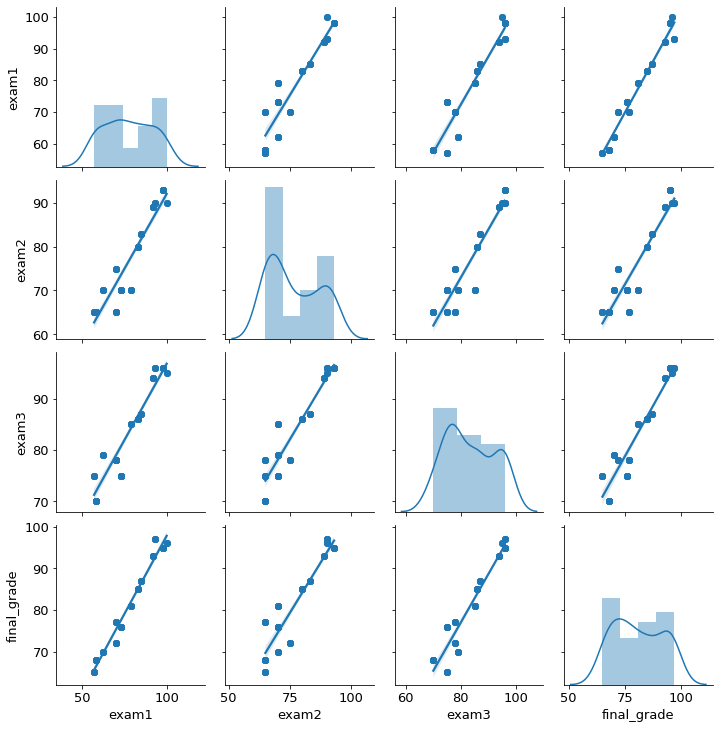

In [18]:
#to see all the plots at once, pairplot but with more customizations
g = sns.PairGrid(train)
#the plots is the diagonal will be a distribution plot
g.map_diag(sns.distplot) #one for a single variable
#the plots not in the diagonal will be a scatter plot
g.map_offdiag(sns.regplot) #one for the interaction of two variables
plt.show()

In [20]:
train.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.934099,0.947911,0.985155
exam2,0.934099,1.000000,0.938353,0.926828
exam3,0.947911,0.938353,1.000000,0.954037
final_grade,0.985155,0.926828,0.954037,1.000000


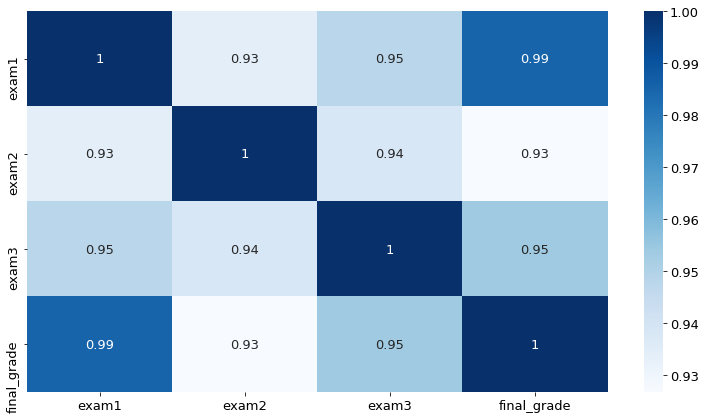

In [22]:
sns.heatmap(train.corr(), cmap = 'Blues', annot = True)
plt.show()

Takeaways: 
- exam 2 has the least correlation with final grade
- exam 1 has the highest correlation with the final grade

Questions: 
- why does exam 2 have a lower correlation
    - the students are slacking midsemester
    - the material covered on the final isn't the same as what is covered in exam 2
    - the material covered midsemester is harder

## Continuous and Categorical

In [23]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


In [27]:
#creating custom bins by cutting the data
#since we created custom bins, we can create labels
#grabbing the value counts of the exam1 grades
train['exam1_letter_grade'] = pd.cut(train.exam1, bins = [0, 70, 80, 90, 105], labels = ['D', 'C', 'B', 'A'])
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,exam1,exam2,exam3,final_grade,exam1_letter_grade
1,98,93,96,95,A
20,73,70,75,76,C
78,100,90,95,96,A
29,83,80,86,85,B
75,58,65,70,68,D


Viz type for a continous x categorical

- boxplot
- bar chart
- violin
- swarmplot

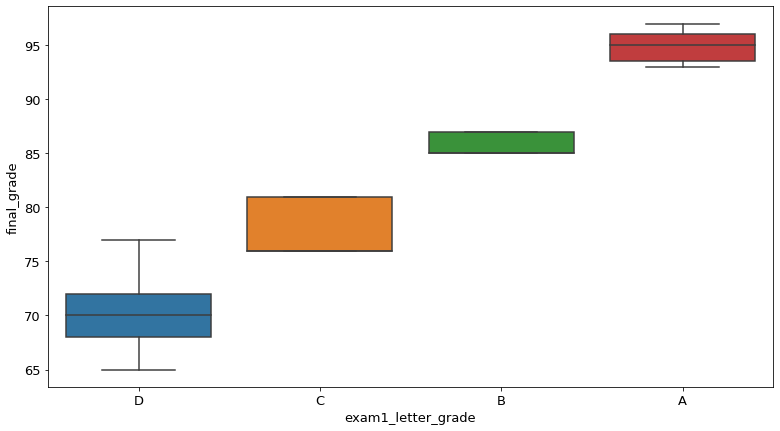

In [29]:
sns.boxplot(data = train, y = 'final_grade', x = 'exam1_letter_grade')
plt.show()

Takeaways:
- students with D's not only have the lowest grade, but also have the most variation in grades
    - maybe this is due to different study habits or workflows?

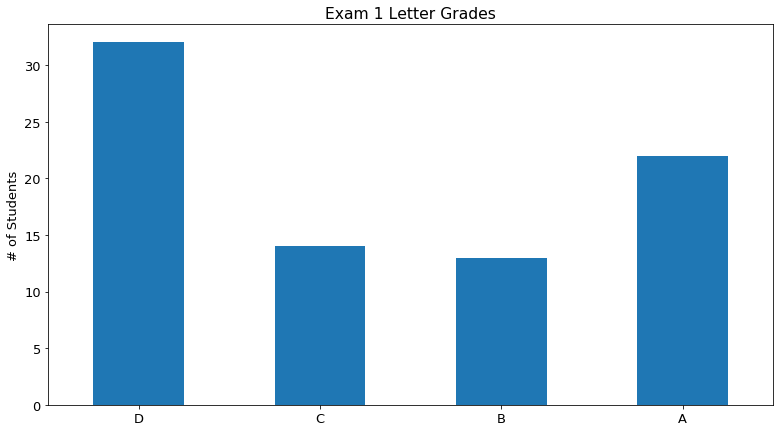

In [39]:
train.exam1_letter_grade.value_counts().sort_index().plot.bar()
plt.ylabel('# of Students')
plt.title('Exam 1 Letter Grades')
plt.xticks(rotation = 0)
plt.show()

Takeaways: There's not significantly fewer observations in the B category, maybe this subgroup is ripe for future research

In [54]:
np.random.seed(125)
#make a fake category called classroom
#picking randomly 'one', or 'two'
#the number of times is the number of rows in train df
#shape[0] will give us the number of rows
train['classroom'] = np.random.choice(['One', 'Two'], train.shape[0])
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,Two
20,73,70,75,76,C,Two
78,100,90,95,96,A,One
29,83,80,86,85,B,Two
75,58,65,70,68,D,Two


## Categorical and Categorical

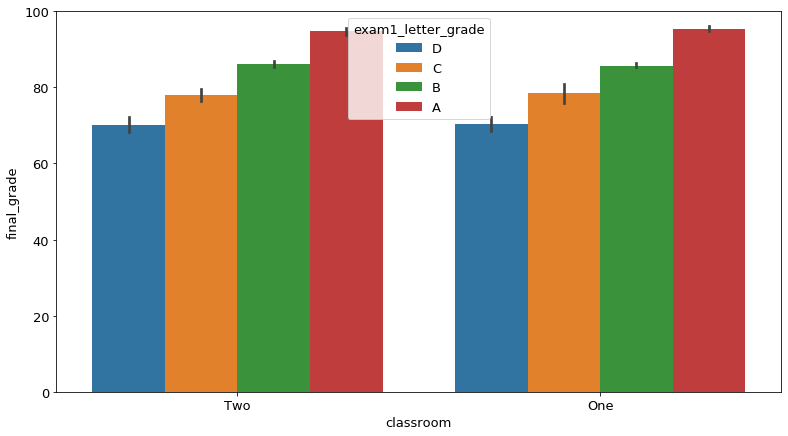

In [55]:
sns.barplot(data = train, y = 'final_grade', x = 'classroom', hue = 'exam1_letter_grade')
plt.ylim(0,100)
plt.show()

Takeaway: The distribution of grades in classroom one and classroom two are about the same.
- classroom doesn't impact the final grade?
    - Let's run a hypothesis test to confirm

- $H_0$: There is no difference in final grade between classroom one and two
- $H_a$: There is a difference in final grade between classroom one and two
- alpha = .05

In [56]:
from scipy import stats

In [57]:
stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade,
    equal_var = False
)

Ttest_indResult(statistic=0.14824815473064099, pvalue=0.8825332594672417)

With a p-value of .88, we accept the null hypothesis that there is no difference in final grade between classroom one and classroom two.